In [1]:
import sys
print(sys.version)

3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]


In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
img_array=cv2.imread("training/train/0/Training_3908.jpg")

In [5]:
print(img_array.shape)

(48, 48, 3)


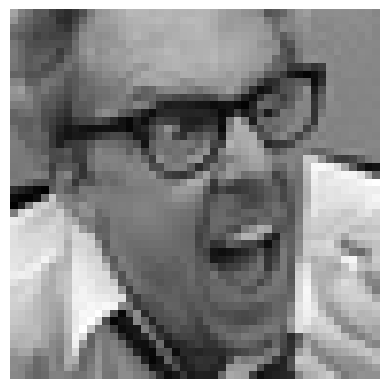

In [6]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("training/train/0/Training_3908.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
plt.imshow(img)
plt.axis('off')
plt.show()


In [7]:
Datadirectory="training/train/"

In [8]:
Classes=["0","1","2","3","4","5","6"]

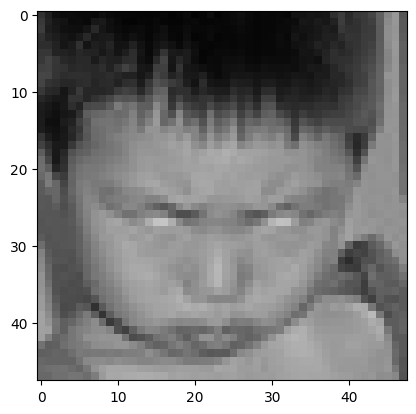

In [9]:
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

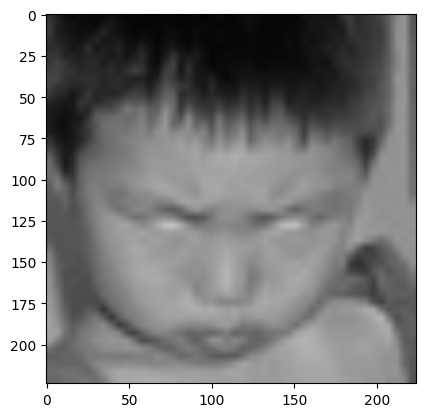

In [10]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
new_array.shape

(224, 224, 3)

### read all the images and covert them to array

In [12]:
training_Data=[]  #data array
def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [13]:
create_training_Data()

In [14]:
print(len(training_Data))

28710


## we are just using training and deploying for real time webcam demo

In [15]:
import random
random.shuffle(training_Data)

In [16]:
x=[]
y=[]

for features,label in training_Data:
    x.append(features)
    y.append(label)

x=np.array(x).reshape(-1,img_size,img_size,3)

In [17]:
x.shape

(28710, 224, 224, 3)

In [18]:
print(img_array)

[[[ 50  50  50]
  [ 32  32  32]
  [ 15  15  15]
  ...
  [133 133 133]
  [151 151 151]
  [ 86  86  86]]

 [[ 57  57  57]
  [ 34  34  34]
  [ 22  22  22]
  ...
  [138 138 138]
  [151 151 151]
  [ 89  89  89]]

 [[ 61  61  61]
  [ 30  30  30]
  [ 24  24  24]
  ...
  [142 142 142]
  [149 149 149]
  [ 89  89  89]]

 ...

 [[103 103 103]
  [100 100 100]
  [100 100 100]
  ...
  [149 149 149]
  [104 104 104]
  [ 85  85  85]]

 [[107 107 107]
  [111 111 111]
  [113 113 113]
  ...
  [151 151 151]
  [120 120 120]
  [ 86  86  86]]

 [[104 104 104]
  [104 104 104]
  [112 112 112]
  ...
  [143 143 143]
  [136 136 136]
  [ 83  83  83]]]


In [19]:
#normalize the data
x_small=x[:1000]
x_small=x_small.astype('float32')/255.0

In [20]:
y[1000]

2

In [21]:
y[0]

5

In [22]:
type(y)

list

In [23]:
y=np.array(y)

In [24]:
y.shape

(28710,)

In [25]:
x_small.shape

(1000, 224, 224, 3)

## deeplearning model for training-transfer learning

In [26]:
import tensorflow as tf

In [27]:
from tensorflow import keras

In [28]:
from tensorflow.keras import layers

In [29]:
model=tf.keras.applications.MobileNetV2() #pre trained model

In [30]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [31]:
base_input=model.layers[0].input

In [32]:
base_output=model.layers[-2].output

In [33]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_154>

In [34]:

final_output=layers.Dense(128)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)

In [35]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, ragged=False, name=keras_tensor_160>

In [36]:
print(type(base_input))

<class 'list'>


In [37]:
print(type(final_output))

<class 'keras.src.backend.common.keras_tensor.KerasTensor'>


In [38]:
from keras.layers import Input, Dense
from keras.models import Model

# base_input must come from keras Input
base_input = Input(shape=(64,))  # Example shape

# build layers using base_input
x = Dense(128, activation='relu')(base_input)
final_output = Dense(10, activation='softmax')(x)

# Now you can build the model
new_model = Model(inputs=base_input, outputs=final_output)

In [39]:
base_input.shape

(None, 64)

In [40]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,610 (37.54 KB)

 Trainable params: 9,610 (37.54 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [42]:
print(type(x), x is None)
print(type(y), y is None)
print(getattr(x,"shape","No shape"))
print(getattr(y,"shape","No shape"))

<class 'keras.src.backend.common.keras_tensor.KerasTensor'> False
<class 'numpy.ndarray'> False
(None, 128)
(28710,)


In [43]:
x_small.shape

(1000, 224, 224, 3)

In [44]:
y.shape

(28710,)

In [45]:
y.shape

(28710,)

In [46]:
new_model.save('my_model_64p35.h5')

In [47]:
new_model=tf.keras.models.load_model('my_model_64p35.h5')

In [48]:
frame=cv2.imread("indian-child-smiling_.jpg")

In [49]:
frame.shape

(2000, 2000, 3)

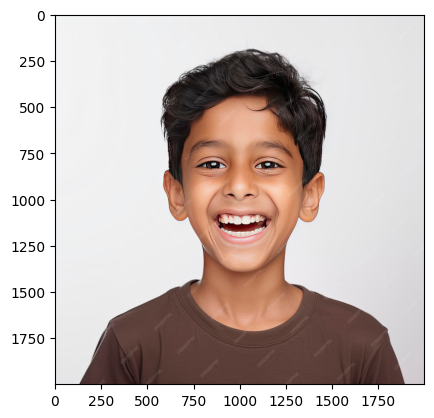

In [50]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [51]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [52]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [53]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh,ex:ex+ew]

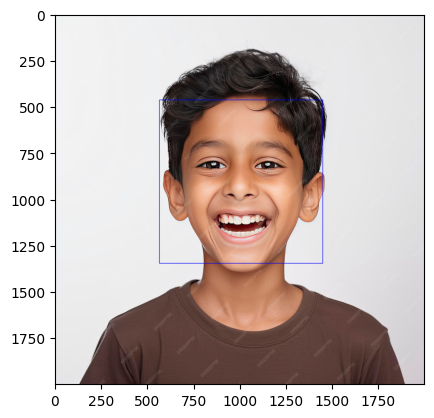

In [54]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

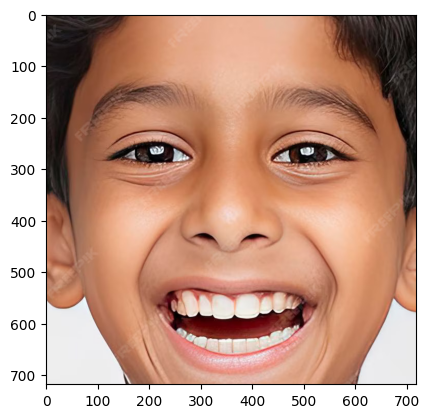

In [55]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [56]:
final_image =cv2.resize(face_roi,(224,224))
final_image =np.expand_dims(final_image,axis =0)  ## need fourth dimension
final_image=final_image/255.0

In [57]:
final_image.shape

(1, 224, 224, 3)

In [58]:
final_image.shape

(1, 224, 224, 3)

In [59]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
num_classes=7
inputs = Input(shape=(48, 48))  # Accepts your current input
x = Flatten()(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs,x)

In [60]:
import numpy as np
final_image=np.array(final_image)

In [61]:
final_image.shape

(1, 224, 224, 3)

In [62]:
import numpy as np
import cv2

# Assuming face_roi is a cropped color image (224x224 or any size)
gray_face = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)   # Convert to grayscale
resized_face = cv2.resize(gray_face, (8, 8))             # Resize to 8x8 → 64 pixels
flattened_face = resized_face.flatten()                  # Shape becomes (64,)
final_input = np.expand_dims(flattened_face, axis=0)     # Add batch dimension → (1, 64)
final_input = final_input / 255.0                        # Normalize


In [63]:
from tensorflow.keras.models import load_model

new_model = load_model("my_model_64p35.h5")
new_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,612 (37.55 KB)

 Trainable params: 9,610 (37.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [64]:
y = np.array([y] * 1000)  # duplicate it to match 1000 samples


In [65]:
y.shape

(1000,)

In [66]:
print("x_small shape:", x_small.shape)
print("y shape:", y.shape)


x_small shape: (1000, 224, 224, 3)
y shape: (1000,)


In [67]:
import numpy as np
import cv2

# Assuming face_roi is a cropped color image (224x224 or any size)
gray_face = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)   # Convert to grayscale
resized_face = cv2.resize(gray_face, (8, 8))             # Resize to 8x8 → 64 pixels
flattened_face = resized_face.flatten()                  # Shape becomes (64,)
final_input = np.expand_dims(flattened_face, axis=0)     # Add batch dimension → (1, 64)
final_input = final_input / 255.0                        # Normalize




In [68]:
# Suppose x_small contains images of shape (1000, 8, 8)
# You need to flatten each image to (64,)
x_small_flattened = x_small.reshape(x_small.shape[0], -1)


In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=64)
x_final = pca.fit_transform(x_small_flattened)  # shape = (1000, 64)


In [70]:
print(x_final.shape)  # should be (1000, 64)
print(y.shape)        # should be (1000,)


(1000, 64)
(1000,)


In [71]:
new_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # or 'categorical_crossentropy' if y is one-hot
    metrics=['accuracy']
)


In [72]:
print("Model expects input shape:", new_model.input_shape)
print("Your input shape:", x_final.shape)


Model expects input shape: (None, 64)
Your input shape: (1000, 64)


In [73]:
import numpy as np
print("Unique labels:", np.unique(y))
print("Max label:", np.max(y))
print("y shape:", y.shape)


Unique labels: [464]
Max label: 464
y shape: (1000,)


In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # y_encoded will now be from 0 to 9 if there are 10 classes


In [75]:
new_model.fit(x_final, y_encoded, epochs=25)


Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3796 - loss: 7.8273
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9993 - loss: 0.0041
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 3.3296e-04
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 4.5227e-04
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 3.1449e-04
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 3.7368e-04
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 3.4339e-04
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 3.0474e-04
Epoch 9/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 2.2324e-04
Epoch 10/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 1.9630e-04
Epoch 11/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 2.8748e-04
Epoch 12/25
32/32 ━━━━━━━━━━━━━━━━━━━━

In [76]:
import numpy as np
import cv2

# Assuming face_roi is a cropped color image (224x224 or any size)
gray_face = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)   # Convert to grayscale
resized_face = cv2.resize(gray_face, (8, 8))             # Resize to 8x8 → 64 pixels
flattened_face = resized_face.flatten()                  # Shape becomes (64,)
final_input = np.expand_dims(flattened_face, axis=0)     # Add batch dimension → (1, 64)
final_input = final_input / 255.0                        # Normalize

# Now use this with your model
predictions = new_model.predict(final_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


In [77]:
from tensorflow.keras.models import load_model

new_model = load_model("my_model_64p35.h5")
new_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,612 (37.55 KB)

 Trainable params: 9,610 (37.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [78]:
loss, accuracy = new_model.evaluate(x_final, y_encoded)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1719 - loss: 13.0864
Loss: 13.7720, Accuracy: 0.1480


In [79]:
predictions = new_model.predict(x_final)
predicted_labels = predictions.argmax(axis=1)

# Compare with actual
print("Predicted:", predicted_labels[:10])
print("Actual:   ", y_encoded[:10])


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted: [2 2 7 5 2 3 0 0 5 0]
Actual:    [0 0 0 0 0 0 0 0 0 0]


In [80]:
print(final_image.shape)


(1, 224, 224, 3)


In [81]:
print(final_image.shape)  # should be (1, 224, 224, 3)


(1, 224, 224, 3)


In [82]:
input_image = cv2.imread('sad_man.jpg')

if input_image is None:
    raise ValueError("Image not loaded. Check the file path.")


In [83]:
print("Normalized shape:", normalized.shape)


NameError: name 'normalized' is not defined

In [ ]:
final_image = np.reshape(normalized, (1, 48, 48, 1))
print("Final image shape:", final_image.shape)


In [84]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load model
new_model = load_model('my_model_64p35.h5')  # Replace with your actual model file

# Load image
img_path = 'sad_man.jpg'  # Replace with your actual image path
input_image = cv2.imread(img_path)

# Check if image loaded
if input_image is None:
    raise ValueError(f"Failed to load image at path: {img_path}")


In [85]:
# Resize to expected input (e.g. 224x224, then grayscale to 48x48 if needed)
input_image = cv2.resize(input_image, (224, 224))
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (48, 48))

# Normalize and reshape
normalized = resized / 255.0
final_image = np.reshape(normalized, (1, 48, 48, 1))  # Model expects (1, 48, 48, 1)


In [86]:
print("Final image shape:", final_image.shape)
print("Model input shape:", new_model.input_shape)


Final image shape: (1, 48, 48, 1)
Model input shape: (None, 64)


In [87]:
print("Model summary:")
new_model.summary()


Model summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,612 (37.55 KB)

 Trainable params: 9,610 (37.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [88]:
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (8, 8))        # (8x8) = 64 pixels
normalized = resized / 255.0
flattened = normalized.flatten()          # Shape: (64,)
final_input = np.reshape(flattened, (1, 64))

predictions = new_model.predict(final_input)
print("Predictions:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
Predictions: [[0.06517424 0.02812559 0.10320686 0.15601647 0.04603668 0.11817437
  0.22988045 0.08594193 0.08995145 0.0774919 ]]


In [89]:
predictions = new_model.predict(final_input)
print("Predictions:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Predictions: [[0.06517424 0.02812559 0.10320686 0.15601647 0.04603668 0.11817437
  0.22988045 0.08594193 0.08995145 0.0774919 ]]


In [90]:
from tensorflow.keras.models import load_model
model = load_model("my_model_64p35.h5")
print(model.output_shape)


(None, 10)


In [91]:
face_input = np.expand_dims(normalized, axis=0)  # (1, 224, 224, 3)


In [92]:
gray_face = cv2.cvtColor(resized_face, cv2.COLOR_BGR2GRAY)   # Convert to gray
small_face = cv2.resize(gray_face, (8, 8))                   # Downscale
normalized = small_face / 255.0                              # Normalize
flattened = normalized.flatten()                             # Flatten to 1D
face_input = np.reshape(flattened, (1, 64))                  # Reshape to (1, 64)


error: OpenCV(4.11.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x6a3ea619::Set<1,-1,-1>,struct cv::impl::A0x6a3ea619::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load model trained on 64 features
new_model = load_model("my_model_64p35.h5")

# Face detection
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# Your 10 emotion labels (adjust to match model)
emotions = ['Happy', 'Sad', 'Angry', 'Neutral', 'Surprised', 'Disgust', 'Fear', 'Confused', 'Calm', 'Excited']

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        roi_color = frame[y:y+h, x:x+w]
        resized_face = cv2.resize(roi_color, (224, 224))

        # 👇 Process face to match model input shape (1, 64)
        gray_face = cv2.cvtColor(resized_face, cv2.COLOR_BGR2GRAY)
        small_face = cv2.resize(gray_face, (8, 8))
        normalized = small_face / 255.0
        flattened = normalized.flatten()
        face_input = np.reshape(flattened, (1, 64))

        predictions = new_model.predict(face_input, verbose=0)
        label_index = int(np.argmax(predictions))

        label = emotions[label_index] if label_index < len(emotions) else "Unknown"

        # Draw label
        cv2.rectangle(frame, (0, 0), (300, 70), (0, 0, 0), -1)
        color = (0, 255, 0) if label == "Neutral" else (0, 0, 255)
        cv2.putText(frame, label, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, color, 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

    cv2.imshow('Face Emotion Recognition', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
